In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', 1000)

# 预处理阶段

## 数据预览

读取训练数据和测试数据

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,NaN,C
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S
322,323,1,2,"Slayter, Miss. Hilda Mary",female,30.0,0,0,234818,12.3500,NaN,Q
656,657,0,3,"Radeff, Mr. Alexander",male,NaN,0,0,349223,7.8958,NaN,S
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S
614,615,0,3,"Brocklebank, Mr. William Alfred",male,35.0,0,0,364512,8.0500,NaN,S
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S


In [4]:
train.info()
print('--------------------------')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-nu

In [5]:
print("训练数据和测试数据中一共包含{}名乘客,其中训练集{}名,测试集{}名".format(len(train) + len(test), len(train),len(test)))

训练数据和测试数据中一共包含1309名乘客,其中训练集891名,测试集418名


可以看出test只比train少了一个Survive(是否生存)的信息,也就是我们需要预测的值

train中共有891个数据,但是只有714人拥有Age属性, 204人拥有Cabin属性, 889人拥有Embarked属性 

test中共有418个数据,仅有332人拥有Age属性, 417人拥有Fare属性, 91人拥有Cabin属性

所以我们需要对train的Age, Cabin, Embarked和test的Age, Fare, Cabin进行缺失值处理.

In [6]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkinson)",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


乘客名中的姓氏其实可以挖掘出国籍,家族等信息; 部分例如Dr的特殊前缀也可以进行一些探索.但是我们缺乏相关背景知识,所以在这里将Name列做删除处理,不加入后续的计算

In [7]:
train.drop("Name", axis = 1, inplace= True)
test.drop("Name", axis = 1, inplace = True)

PassengerId仅为乘客编号,对于后续分析没有任何帮助(但是我们有输出答案的需要,所以使用一个变量存放PassengerId). 而Ticket为比较重复项极少的Categorical Value且没有规律,其中难以提取有价值的信息,也需要删除

In [8]:
test_ids = test["PassengerId"]
train.drop(["PassengerId", "Ticket"], axis = 1, inplace= True)
test.drop(["PassengerId", "Ticket"], axis = 1, inplace = True)

通过数据背景知识,SibSp和Parch可以合并为家庭成员数量

In [9]:
train['Family'] = train['SibSp'] + train['Parch']
test['Family'] = test['SibSp'] + test['Parch']
train.drop(["SibSp", "Parch"], axis = 1, inplace = True)
test.drop(["SibSp", "Parch"], axis = 1, inplace = True)

## 数据的可视化

### 各特征与survive之间的关系

由背景材料得知, 女性生存率远小于男性生存率.所以我们需要对男女数据分别进行观察.这里为了增加易用性,在进行多维数据可视化时使用seaborn代替原生matplotlib作为可视化库

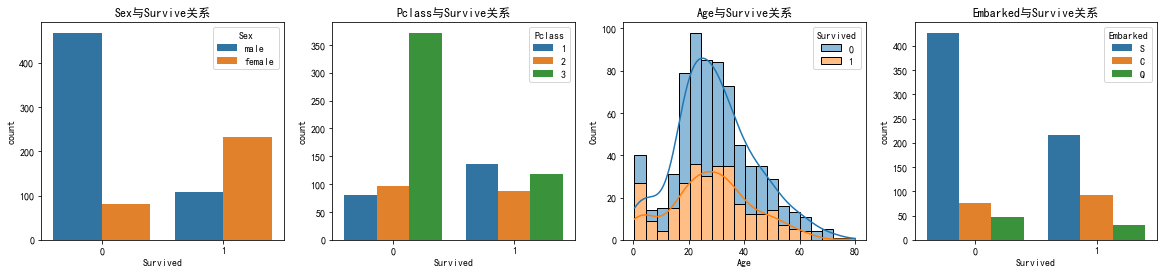

In [10]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来显示图例中中文内容,若不进行该特殊设置,matplotlib及其相关扩展库通常不支持中文
plt.figure(figsize=[20,4])

plt.subplot(1, 4, 1)
sns.countplot(x='Survived', hue='Sex', data=train)
plt.title("Sex与Survive关系")

plt.subplot(1, 4, 2)
sns.countplot(x='Survived', hue='Pclass', data=train)
plt.title("Pclass与Survive关系")

plt.subplot(1, 4, 3)
sns.histplot(data=train, x="Age", hue="Survived", multiple="stack", kde = True) #和旧版seaborn的distplot是一个东西
plt.title("Age与Survive关系")

plt.subplot(1, 4, 4)
sns.countplot(x='Survived', hue='Embarked', data=train)
plt.title("Embarked与Survive关系")


plt.show()

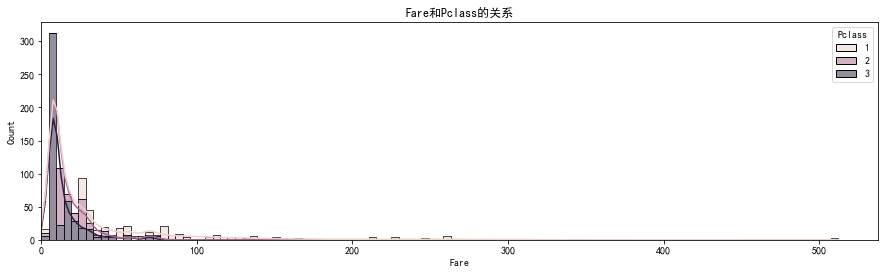

In [11]:
plt.figure(figsize=[15,4])
both_pcls = pd.concat([train['Pclass'], test['Pclass']], axis = 0)
both_fare = pd.concat([train['Fare'], test['Fare']], axis = 0)
fare_pcls = pd.concat([both_fare, both_pcls], axis = 1)
pclasses = train['Pclass'].value_counts().keys().values.tolist()
sns.histplot(data = train, x = 'Fare', hue = 'Pclass', kde = True, multiple="stack")
plt.xlim(left = 0) #上面设置的SimHei字体没办法正确渲染负号, 如果不设置这行会报错.由于我们在上面describe看到fare不会小于0,所以可以限制最小的x为0
plt.title("Fare和Pclass的关系")
plt.show()

右方长尾数据极其影响观察,所以修改代码, 对其进行部分截断:

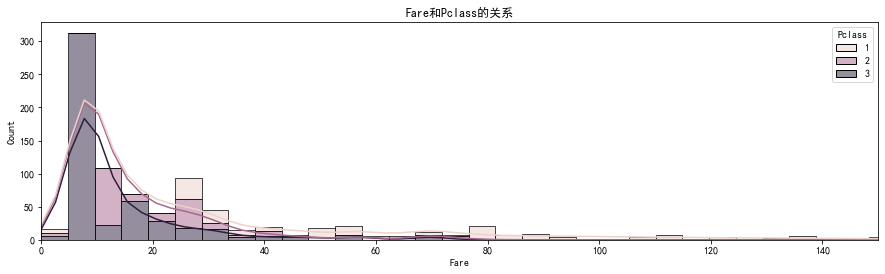

In [12]:
plt.figure(figsize=[15,4])
both_pcls = pd.concat([train['Pclass'], test['Pclass']], axis = 0)
both_fare = pd.concat([train['Fare'], test['Fare']], axis = 0)
fare_pcls = pd.concat([both_fare, both_pcls], axis = 1)
pclasses = train['Pclass'].value_counts().keys().values.tolist()
sns.histplot(data = train, x = 'Fare', hue = 'Pclass', kde = True, multiple="stack")
plt.xlim(left = 0, right = 150) 
plt.title("Fare和Pclass的关系")
plt.show()

Pclass与Fare似乎有一些相关性,我们将在之后研究各个变量之间的相关系数,去除关联度过高的变量(原理:多重共线性)

In [13]:
family_survive = pd.pivot_table(train,index=['Family', 'Survived'], aggfunc={'Survived':len})
family_survive.rename(columns={'Survived': 'Survived_Number'}, inplace = True)
family_survive

Survived_Number
Family Survived                 
0      0                     374
       1                     163
1      0                      72
       1                      89
2      0                      43
       1                      59
3      0                       8
       1                      21
4      0                      12
       1                       3
5      0                      19
       1                       3
6      0                       8
       1                       4
7      0                       6
10     0                       7

In [14]:
def plotting_percentages(df, col, target): # Code from https://medium.com/swlh/how-to-create-percentage-plots-for-visualizing-your-data-in-python-f0d894d7c7bb
    x, y = col, target
    
    # Temporary dataframe with percentage values
    temp_df = df.groupby(x)[y].value_counts(normalize=True)
    temp_df = temp_df.mul(100).rename('Survived_Percent').reset_index()

    # Sort the column values for plotting    
    order_list = list(df[col].unique())
    order_list.sort()

    # Plot the figure
    sns.set(font_scale=1.5)
    g = sns.catplot(x=x, y='Survived_Percent', hue=y,kind='bar', data=temp_df, 
                    height=8, aspect=2, order=order_list, legend_out=False)
    g.ax.set_ylim(0,100)

    # Loop through each bar in the graph and add the percentage value    
    for p in g.ax.patches:
        if not pd.isna(p.get_height()): # some bars with out values will not be drawn, add this line to prevent from warming message
            txt = str(p.get_height().round(1)) + '%'
            txt_x = p.get_x() 
            txt_y = p.get_height()
            g.ax.text(txt_x,txt_y,txt)
        
    # Set labels and title
    plt.title(f'{col.title()} By Percent {target.title()}', 
              fontdict={'fontsize': 30})
    plt.xlabel(f'{col.title()}', fontdict={'fontsize': 20})
    plt.ylabel(f'{target.title()} Percentage', fontdict={'fontsize': 20})
    plt.xticks(rotation=75)
    return g

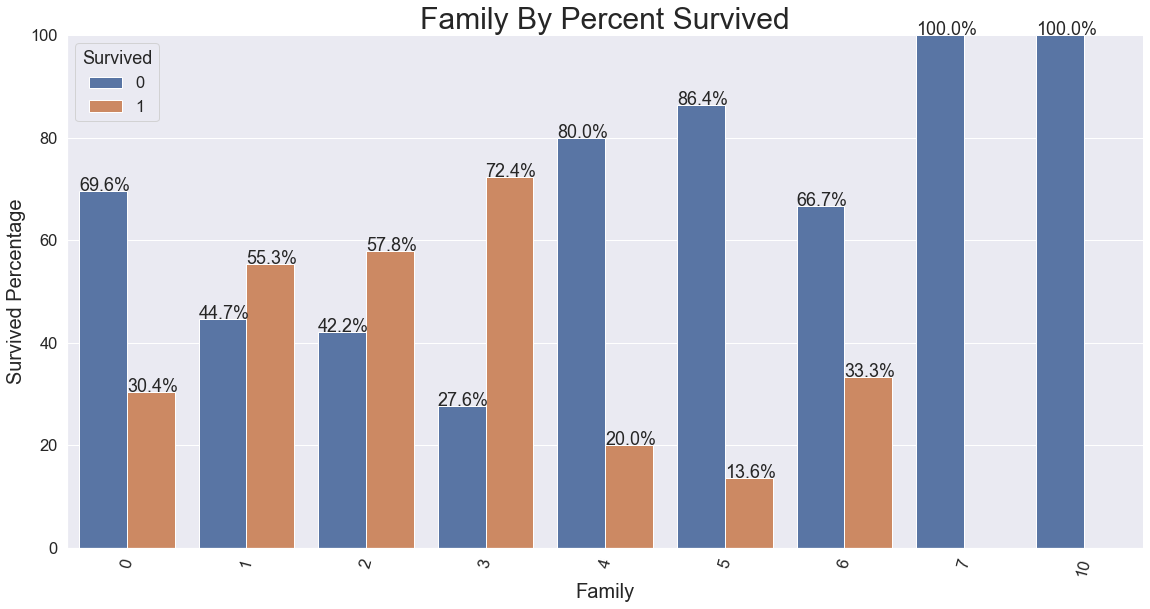

In [15]:
plotting_percentages(train, "Family", "Survived")

## 缺失值处理

## Cabin列

我们首先考虑对Cabin进行处理,从describe和info中可以看出Cabin中有147个不重复项(最多重复次数为4)且为字符串形式,缺失值也非常多

对于此类型数据, 一般使用以下几种方式处理:

1. 直接删除该特征,不加入后续计算

2. 将特征按有数据-无数据二值化为0-1,加入后续计算

3. 非空数值是否有一定的规则存在?若有规则存在,如第一个字符为A,B,C...那么可将其当成数个Categorical Value进行处理,这通常需要结合数据的相关背景知识

In [16]:
def df_survive_nan(col_withna):
    '''
    type col_withna: String, column in train with nan cells.
    return: pandas DataFrame. column: Survived/Died; rows: empty/not empty
    '''
    has_val_live = train[col_withna][(train['Survived'] == 1) & (pd.isna(train[col_withna]) == False)].count()
    has_val_died = train[col_withna][(train['Survived'] == 0) & (pd.isna(train[col_withna]) == False)].count()
    no_val_live = len(train[col_withna][(train['Survived'] == 1) & (pd.isna(train[col_withna]) == True)]) # 计算有空值的数据长度时不能用count, count会直接排除空值(这里如果使用count, 那么得到的结果是0)
    no_val_died = len(train[col_withna][(train['Survived'] == 0) & (pd.isna(train[col_withna]) == True)])
    df = pd.DataFrame({"Survived":{'has_' + col_withna: has_val_live, 'no_' + col_withna :no_val_live}, "Died":{'has_' + col_withna: has_val_died, 'no_' + col_withna :no_val_died}})
    return df

           Survived  Died
has_Cabin       136    68
no_Cabin        206   481


<AxesSubplot:>

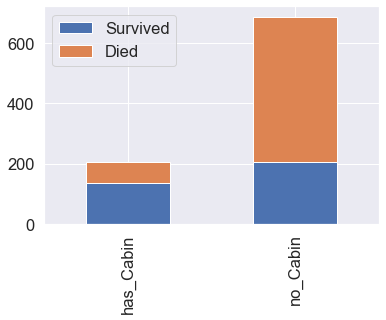

In [17]:
check_cabin = df_survive_nan('Cabin')
print(check_cabin)
check_cabin.plot.bar(stacked = True)

可以看出有Cabin的乘客生存几率较高, 故可将是否拥有Cabin二值化为0,1处理

In [18]:
train['Cabin'] = train['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)
test['Cabin'] = test['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

In [19]:
train.describe(include = 'all')

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,889,891.000000
unique,NaN,NaN,2,NaN,NaN,NaN,3,NaN
top,NaN,NaN,male,NaN,NaN,NaN,S,NaN
freq,NaN,NaN,577,NaN,NaN,NaN,644,NaN
mean,0.383838,2.308642,NaN,29.699118,32.204208,0.228956,NaN,0.904602
std,0.486592,0.836071,NaN,14.526497,49.693429,0.420397,NaN,1.613459
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,NaN,0.000000
25%,0.000000,2.000000,NaN,20.125000,7.910400,0.000000,NaN,0.000000
50%,0.000000,3.000000,NaN,28.000000,14.454200,0.000000,NaN,0.000000
75%,1.000000,3.000000,NaN,38.000000,31.000000,0.000000,NaN,1.000000


## Age列

Age的缺失值相对较少,且为Numerical Value

所以我们需要进行缺失值填充

缺失值填充的方法通常有:

1. 取平均值(较为常用)

2. 取中位数(对于两侧outlier较多或outlier在箱状图中与"箱子"距离过远)

3. 变成0或最大(个别情况,一般不这样做)

我们来看看年龄分布

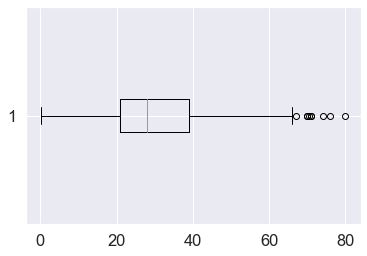

In [20]:
all_ages = pd.concat([train['Age'], test['Age']], axis = 0).dropna()
plt.boxplot(all_ages, vert = False)
plt.show()

存在一些outliers, 为保险起见使用中位数填充缺失数据

In [21]:
train['Age'].fillna(all_ages.median(), inplace = True)
test['Age'].fillna(all_ages.median(), inplace = True)

### Embark列

对于缺失值极少的Categorical Value, 可以采取使用值最多的分类填充缺失值的方法

In [22]:
all_embarks = pd.concat([train['Embarked'], test['Embarked']], axis = 0).dropna()
embarks_mode = all_embarks.mode()[0]
train['Embarked'].fillna(embarks_mode, inplace = True)

### Fare列

缺失值很少的Numerical Value,直接使用中位数填充即可

In [23]:
test['Fare'].fillna(pd.concat([train['Fare'], test['Fare']], axis = 0).median(), inplace = True)

至此缺失值填充完毕

In [24]:
train.info()
print('--------------------------')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Cabin     891 non-null    int64  
 6   Embarked  891 non-null    object 
 7   Family    891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
--------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   Fare      418 non-null    float64
 4   Cabin     418 non-null    int64  
 5   Embarked  418 non-null    object 


In [25]:
train.describe(include = 'all')

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891,891.000000
unique,NaN,NaN,2,NaN,NaN,NaN,3,NaN
top,NaN,NaN,male,NaN,NaN,NaN,S,NaN
freq,NaN,NaN,577,NaN,NaN,NaN,646,NaN
mean,0.383838,2.308642,NaN,29.361582,32.204208,0.228956,NaN,0.904602
std,0.486592,0.836071,NaN,13.019697,49.693429,0.420397,NaN,1.613459
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,NaN,0.000000
25%,0.000000,2.000000,NaN,22.000000,7.910400,0.000000,NaN,0.000000
50%,0.000000,3.000000,NaN,28.000000,14.454200,0.000000,NaN,0.000000
75%,1.000000,3.000000,NaN,35.000000,31.000000,0.000000,NaN,1.000000


In [26]:
test.describe(include = 'all')

,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
count,418.000000,418,418.000000,418.000000,418.000000,418,418.000000
unique,NaN,2,NaN,NaN,NaN,3,NaN
top,NaN,male,NaN,NaN,NaN,S,NaN
freq,NaN,266,NaN,NaN,NaN,270,NaN
mean,2.265550,NaN,29.805024,35.576535,0.217703,NaN,0.839713
std,0.841838,NaN,12.667969,55.850103,0.413179,NaN,1.519072
min,1.000000,NaN,0.170000,0.000000,0.000000,NaN,0.000000
25%,1.000000,NaN,23.000000,7.895800,0.000000,NaN,0.000000
50%,3.000000,NaN,28.000000,14.454200,0.000000,NaN,0.000000
75%,3.000000,NaN,35.750000,31.471875,0.000000,NaN,1.000000


## Categorical Value转为Numerical Value

常用方法:

1. One-hot Encoding(进阶版为Dummy Encoding) - 处理类别间没有大小关系的数据
2. Order Encoding(也叫Label Encoding) - 处理类别间有大小关系的数据
3. Binary Encoding - One-hot Encoding的进阶版, 将类别编码映射为二进制,节省空间

由于Sex和Embarked都没有大小关系,并且Sex只有两项,Embarked也只有三项,所以选择Dummy Encoding对这两项进行处理

对于Sex, 将male转换为1,将female转换为0.对Embarked,直接拉pandas库进行处理

In [27]:
def replace_sex(df):
    '''
    type df: Pandas DataFrame, train or test
    '''
    df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
replace_sex(train)
replace_sex(test)

In [28]:
def encode_embarked(df):
    '''
    type df: Pandas DataFrame, train or test.
    '''
    dummy_features = pd.get_dummies(df['Embarked'])
    new_df = pd.concat([df, dummy_features], axis = 1)
    new_df.drop("Embarked", axis = 1, inplace = True)
    return new_df

In [29]:
pretty_train = encode_embarked(train)
pretty_test = encode_embarked(test)

对数据进行标准化(否则回归算法无法使用)

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
x_cols = pretty_test.columns.tolist()
train_x = pretty_train[x_cols]
train_y = pretty_train['Survived']
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(pretty_test)

## 相关性初步研究

在pandas默认方法中, 数值型变量之间的相关性使用皮尔逊相关系数检查,该方法速度快,易于理解.但是受异常值影响较大且要求数据本身是正态分布的.

由于我们前面已经对特征做了标准化,所以可以使用该系数进行处理.如果未进行过标准化,比较推荐的系数标准是spearman

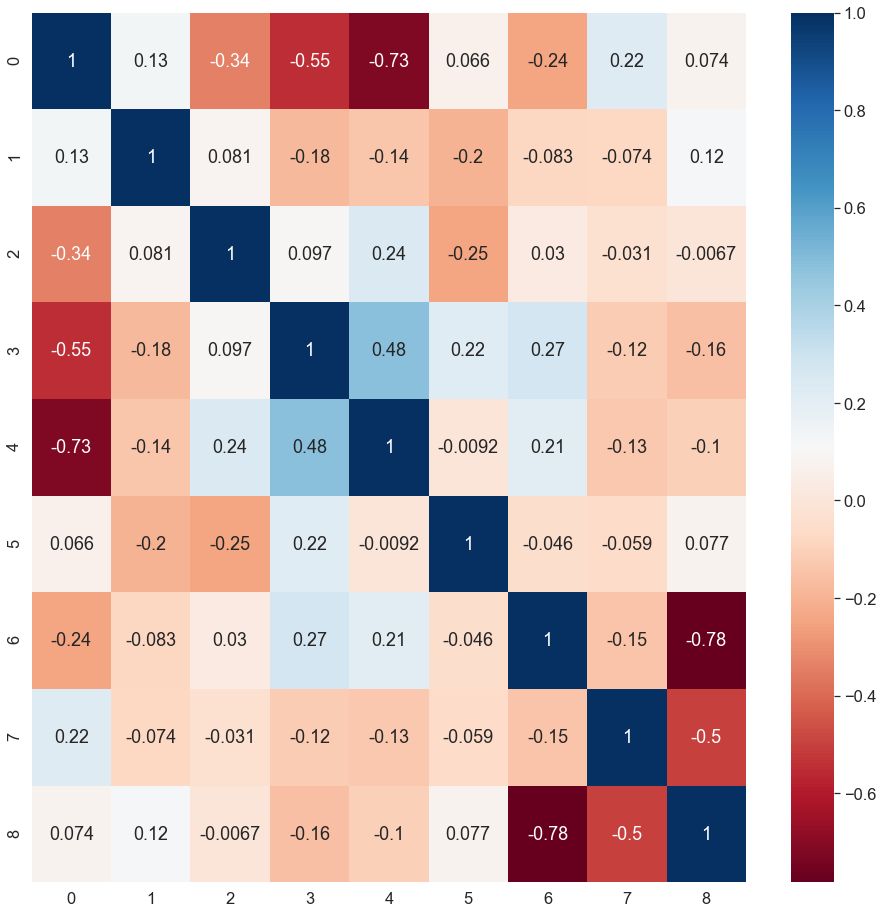

In [32]:
all_data = pd.DataFrame(train_x)
plt.figure(figsize=[16, 16])
sns.heatmap(all_data.corr(),annot=True, cmap = plt.cm.RdBu)
plt.show()

部分变量的相关性较高.在选取模型的时候,我们应避免使用会被多重共线性影响的模型,或进行降维(但在本数据集中由于特征过少,不推荐使用PCA降维)

# 数据建模

对于二分类问题,通常使用一些常用的分类库进行交叉验证,选取train中结果分数最高的分类器作用于test上

In [33]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

In [34]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(), # adaboost
    ensemble.BaggingClassifier(), # bagging分类器
    ensemble.ExtraTreesClassifier(), #Extremely Randomized Trees
    ensemble.GradientBoostingClassifier(), # GDBT
    ensemble.RandomForestClassifier(), #随机森林

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),

    #GLM
    # linear_model.LogisticRegressionCV(), # 如果不使用L2正则项则会被多重共线性影响,不适用
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),

    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),

    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),

    #SVM
    svm.SVC(probability=True), # 如果不加l2参数, 会严重受多重共线性影响.但是默认是有加的
    svm.NuSVC(probability=True),
    svm.LinearSVC(),

    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),

    #Discriminant Analysis
    # discriminant_analysis.LinearDiscriminantAnalysis(), #受多重共线性影响,集体阵亡
    # discriminant_analysis.QuadraticDiscriminantAnalysis(),


    #xgboost
    XGBClassifier(eval_metric = 'logloss', use_label_encoder=False) #如果直接使用xgb默认参数会出现很多很烦人的warming
    ]

In [35]:
def get_score_df(n_splits, test_size, train_size, MLA, x, y, scoring, random_state = 0):
    cv_split = ShuffleSplit(n_splits = n_splits, test_size = test_size, train_size = train_size, random_state = random_state)
    score_name = 'MLA Test Score({})'.format(scoring)
    MLA_columns = ['MLA Name',
               score_name,'MLA Time']
    MLA_compare = pd.DataFrame(columns = MLA_columns)
    MLA_dic = dict()
    row_index = 0
    for alg in MLA:
        MLA_name = alg.__class__.__name__
        MLA_dic[MLA_name] = alg
        MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
        cv_results = cross_validate(alg, x, y, cv = cv_split, scoring = scoring)
        MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
        MLA_compare.loc[row_index, score_name] = cv_results['test_score'].mean()   
        row_index += 1
        print(MLA_name + ' Finished')
    MLA_compare.sort_values(by = [score_name, 'MLA Time'], ascending = False, inplace = True)
    return MLA_compare, MLA_dic

In [36]:
MLA_compare, MLA_dic = get_score_df(10, 0.2, 0.8, MLA, train_x, train_y, scoring = 'accuracy')

AdaBoostClassifier Finished
BaggingClassifier Finished
ExtraTreesClassifier Finished
GradientBoostingClassifier Finished
RandomForestClassifier Finished
GaussianProcessClassifier Finished
PassiveAggressiveClassifier Finished
RidgeClassifierCV Finished
SGDClassifier Finished
Perceptron Finished
BernoulliNB Finished
GaussianNB Finished
KNeighborsClassifier Finished
SVC Finished
NuSVC Finished
C:\Users\Admin\.conda\envs\analyze\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Admin\.conda\envs\analyze\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Admin\.conda\envs\analyze\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

In [37]:
MLA_compare

,MLA Name,MLA Test Score(accuracy),MLA Time
3,GradientBoostingClassifier,0.839665,0.078186
18,XGBClassifier,0.828492,0.105223
13,SVC,0.825698,0.083275
0,AdaBoostClassifier,0.817877,0.065525
5,GaussianProcessClassifier,0.817318,0.1816
4,RandomForestClassifier,0.814525,0.133939
14,NuSVC,0.812849,0.097343
15,LinearSVC,0.811732,0.024436
12,KNeighborsClassifier,0.808939,0.001895
1,BaggingClassifier,0.808939,0.019257


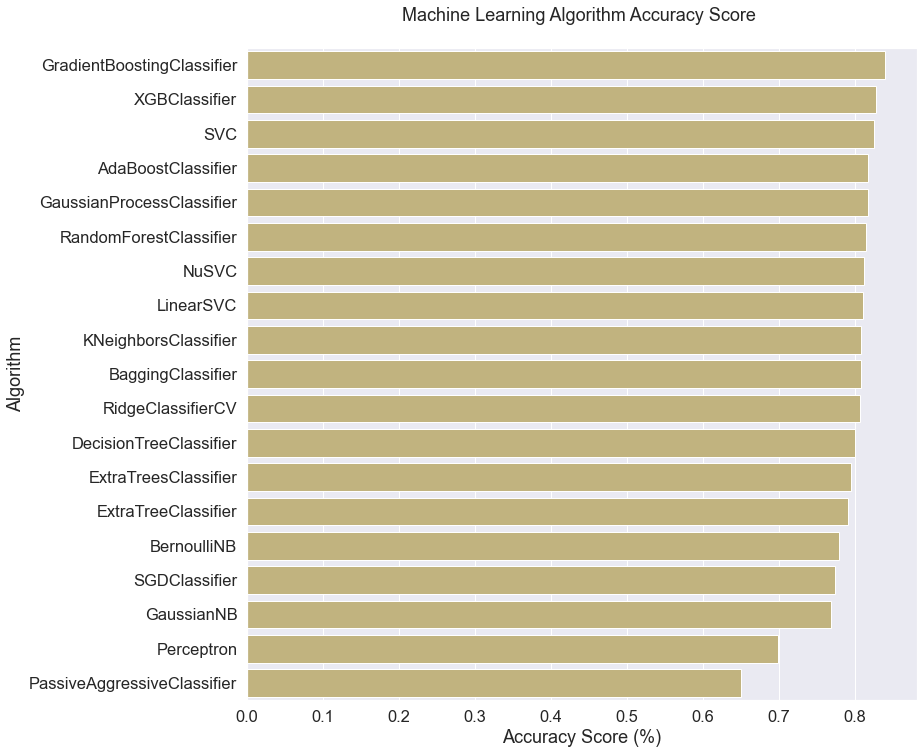

In [38]:
f,ax = plt.subplots(figsize=(12, 12))

sns.barplot(x='MLA Test Score(accuracy)', y = 'MLA Name', data = MLA_compare, color = 'y', ax=ax)

plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.show()

In [39]:
def voting(models, train_x, train_y, target_x):
    base_arr = []
    for model in models:
        model.fit(train_x, train_y)
        cur_res = model.predict(target_x)
        base_arr.append(cur_res.astype(int))
    result_df = pd.DataFrame(base_arr).T #转置
    ans = result_df.mode(axis = 1)
    ans = ans[0].tolist()
    return ans

In [40]:
models = MLA_compare['MLA Name'][:5].tolist()
print("Model Chosen" + str(models))
model_touse = list()
for model in models:
    model_touse.append(MLA_dic[model])

Model Chosen['GradientBoostingClassifier', 'XGBClassifier', 'SVC', 'AdaBoostClassifier', 'GaussianProcessClassifier']


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

scores = []
for rd in range(10):
    train_data, test_data, train_target, test_target = train_test_split(train_x, train_y, test_size = 0.2, random_state = rd)
    res = voting(model_touse, train_data, train_target, test_data)
    cur_score = accuracy_score(test_target, res)
    scores.append(cur_score)

In [42]:
print(sum(scores)/len(scores))

0.8089385474860336


In [43]:
test_predict = voting(model_touse, train_x, train_y, test_x)
result = {'PassengerId': test_ids,
          'Survived': test_predict}
result = pd.DataFrame(result)
result.to_csv('submission.csv',index=False)

In [44]:
model = MLA_dic['GradientBoostingClassifier']
model.fit(train_x, train_y)
test_predict = model.predict(test_x).astype(int)
result = {'PassengerId': test_ids,
          'Survived': test_predict}
result = pd.DataFrame(result)
result.to_csv('submission_1.csv',index=False)